In [3]:
import numpy as np
import torch
import sys
from utils_old import *
import utils
from matplotlib import pyplot as plt
import torch.nn as nn
import time
from numba import cuda
from tqdm import tqdm, trange
import os
import pyroc
import pandas as pd
import gc
from IPython.display import clear_output
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"  
device = torch.device("cuda:0")
dtype = torch.float32
torch.manual_seed(42)
np.random.seed(42)

/math/home/eruisun/software/anaconda/envs/LFI/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
ns_total = np.array([1600000, 1300000, 1000000, 700000, 400000, 200000, 100000, 50000, 30000, 10000, 6000, 4500, 3000, 2000, 1000])
ms_total =  10**np.linspace(0, 5, 50)
ms_total = ms_total.astype(int)

ns1 = np.load('ns1.npy')
ms1 = np.load('ms1.npy')
Error_m_ntr_cat1 = np.load('Error_m_ntr_M1.npy')

ns2 = np.load('ns2.npy')
ms2 = np.load('ms2.npy')
Error_m_ntr_cat2 = np.load('Error_m_ntr_M2.npy')

ns3 = np.load('ns3.npy')
ms3 = np.load('ms3.npy')
Error_m_ntr_cat3 = np.load('Error_m_ntr_M3.npy')

ns4 = np.load('ns4.npy')
ms4 = np.load('ms4.npy')
Error_m_ntr_cat4 = np.load('Error_m_ntr_M4.npy')

ns5 = np.load('ns5.npy')
ms5 = np.load('ms5.npy')
Error_m_ntr_cat5 = np.load('Error_m_ntr_M5.npy')

ns6 = np.load('ns6.npy')
ms6 = np.load('ms6.npy')
Error_m_ntr_cat6 = np.load('Error_m_ntr_M6.npy')

ns7 = np.load('ns7.npy')
ms7 = np.load('ms7.npy')
Error_m_ntr_cat7 = np.load('Error_m_ntr_M7.npy')


# Check if there is nan or inf in the matrix Error_total. 

If yes, recall Error_total is the average of Error_m_ntr_cat1 to Error_m_ntr_cat7.   
Please find which one the error comes from.    
The error might be because the network is not well-trained, like exploding gradient.  
One can just manually set the abnormal Error_m_ntr_cat[i,j]=2 (e.g. Error_m_ntr_cat5[4,6]=2).  
Then all points with value > truncate_value will not be counted.

In [ ]:

# Adjust this to delete abnormal data
truncate_value = 1.5
min_m = 2.9
min_n = 999
ms_total = ms_total[ms_total>min_m]
ns_total = ns_total[ns_total>min_n]

count_total = np.zeros((len(ns_total), len(ms_total)))
Error_total = np.zeros((len(ns_total), len(ms_total)))

for i in range(len(ns1)):
    for j in range(len(ms1)):
        n = ns1[i]
        m = ms1[j]
        if Error_m_ntr_cat1[i,j]>truncate_value or m<min_m or n<min_n:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat1[i,j]
    
for i in range(len(ns2)):
    for j in range(len(ms2)):
        n = ns2[i]
        m = ms2[j]
        if Error_m_ntr_cat2[i,j]>truncate_value or m<min_m:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat2[i,j]

for i in range(len(ns3)):
    for j in range(len(ms3)):
        n = ns3[i]
        m = ms3[j]
        if Error_m_ntr_cat3[i,j]>truncate_value or m<min_m:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat3[i,j]

for i in range(len(ns4)):
    for j in range(len(ms4)):
        n = ns4[i]
        m = ms4[j]
        if Error_m_ntr_cat4[i,j]>truncate_value or m<min_m or n<min_n:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat4[i,j]


for i in range(len(ns5)):
    for j in range(len(ms5)):
        n = ns5[i]
        m = ms5[j]
        if Error_m_ntr_cat5[i,j]>truncate_value or m<min_m or n<min_n:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat5[i,j]

for i in range(len(ns6)):
    for j in range(len(ms6)):
        n = ns6[i]
        m = ms6[j]
        if Error_m_ntr_cat6[i,j]>truncate_value or m<min_m or n<min_n:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat6[i,j]

for i in range(len(ns7)):
    for j in range(len(ms7)):
        n = ns7[i]
        m = ms7[j]
        if Error_m_ntr_cat7[i,j]>truncate_value or m<min_m or n<min_n:
            continue
        idx = np.where((ns_total-n)**2<1e-2)
        idy = np.where((ms_total-m)**2<1e-2)
        count_total[idx, idy] += 1
        Error_total[idx, idy] += Error_m_ntr_cat7[i,j]

Error_total = Error_total/count_total

In [ ]:
fig = plt.figure(figsize=(25, 4))
plt.subplot(1,6,1)
plt.imshow(Error_m_ntr_cat1, origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()

plt.subplot(1,6,2)
plt.imshow(Error_m_ntr_cat2, origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()

plt.subplot(1,6,3)
plt.imshow(Error_m_ntr_cat3, origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()

plt.subplot(1,6,4)
plt.imshow(Error_m_ntr_cat4, origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()

plt.subplot(1,6,5)
plt.imshow(Error_m_ntr_cat5, origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()

plt.subplot(1,6,6)
plt.imshow(Error_m_ntr_cat6, origin='lower', extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()

#Calculate how many nan in Error_total 
nan_of_inf = 0
out_range = 0
for i in range(len(ns_total)):
    for j in range(len(ms_total)):
        if (Error_total[i,j] != Error_total[i,j]):
            nan_of_inf+=1
        if (Error_total[i,j]>1) or (Error_total[i,j]<0):
            out_range+=1

if out_range>0:
    print('There are %d out of [0,1] in Error_total' %out_range)
if nan_of_inf>0:
    print('There are %d nan or inf in Error_total' %nan_of_inf)
    print('WARNING: There are nan or inf in Error_total. Please check if the network is well-trained. ')
    print('Just manually set the nan or inf to 0.')
    raise ValueError('WARNING: There are nan or inf in Error_total. Please check if the network is well-trained. ')


# Plot

In [ ]:
from scipy.ndimage import gaussian_filter
Error_total = gaussian_filter(Error_total, sigma=0.7)

In [10]:
Type12_mat_log = -np.log10(-np.log10(Error_total))
maxi = 1.5 # just to truncate the colorbar
Type12_mat_log[Type12_mat_log>maxi]=maxi

[0.00000000e+000 6.47674575e-252 3.24101286e-159 1.00000000e-100
 8.02168404e-064 1.54626151e-040 7.60563860e-026 1.41601572e-016
 1.00000000e-010 4.90260106e-007 1.04454774e-004 3.07690132e-003
 2.60079911e-002 1.00000000e-001 2.33906697e-001 3.99846068e-001
 5.60804328e-001 6.94241675e-001 7.94328235e-001 8.64777269e-001
 9.12408417e-001 9.43802527e-001]


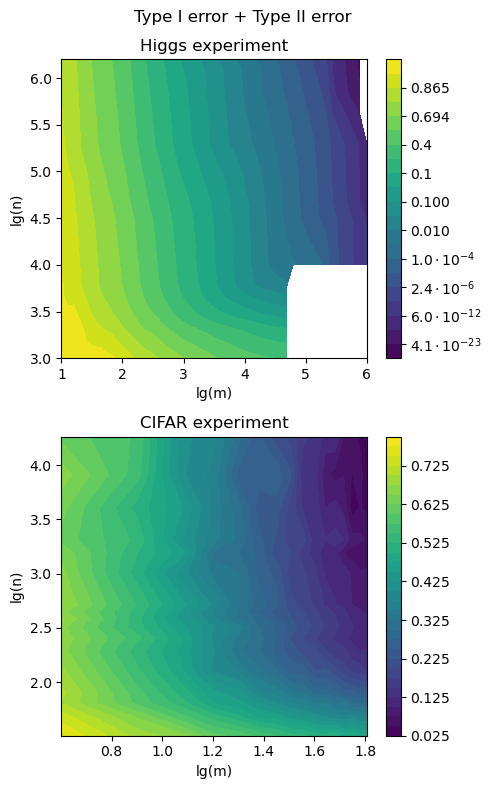

In [ ]:
# Error_m_ntr_cat = np.concatenate((Error_m_ntr_M[:,0:30], Error_m_ntr_G[:,30:50]), axis=1)
fig = plt.figure(figsize=(5,5))

# plt.subplot(2,1,1)

contourf_ = plt.contourf(np.log10(ms_total), np.log10(ns_total), Type12_mat_log, levels=20)
cb = fig.colorbar(contourf_)
log_log_p_list = cb.mappable.levels # np.linspace(Type12_mat_log.min()+0.00001, Type12_mat_log.max()-0.000001, levels+1)
real_p_list = 10**(-(10**(-log_log_p_list)))
print(real_p_list)
real_p_list = np.around(real_p_list, decimals=3)
real_p_list = real_p_list.astype(str)
# real_p_list[1] = '$4.1\cdot 10^{-23}$'
# real_p_list[3] = '$6.0\cdot 10^{-12}$'
# real_p_list[5] = '$2.4\cdot 10^{-6}$'
# real_p_list[7] = '$1.0\cdot 10^{-4}$'
# real_p_list[9] = '0.010'
# real_p_list[11] = '0.100'

cb.set_ticks(log_log_p_list[1:-1:2])
cb.set_ticklabels(real_p_list[1:-1:2])

plt.xlabel('lg(m)')
plt.ylabel('lg(n)')
plt.title('Higgs experiment')
#plt.suptitle(r'Fix kernel ($n_{train}=1.3e6$), Use Gaussian Approx='+str(Use_Gaussian)+', $\pi$='+str(pi))
# plt.ylim(3,6.2)
# plt.xlim(1,6)

# import pickle as pkl
# plt.subplot(2,1,2)
# X, Y, R = pkl.load(open('Countourf.pkl', 'rb'))
# R = gaussian_filter(R, sigma=0.1)
# plt.contourf(np.log10(X),np.log10(2*Y),(2-2*R).T, levels=30)
# plt.xlabel('lg(m)')
# plt.ylabel('lg(n)')
# plt.colorbar()
# plt.title('CIFAR experiment')

# plt.suptitle('Type I error + Type II error ')
# plt.tight_layout()

# plt.savefig('./paper/tradeoff.pdf')


In [ ]:

# ns = np.array([1300000, 1000000, 700000, 400000, 200000, 100000, 50000, 30000, 10000, 6000, 3000])
# ms = 10**np.linspace(1, 4, 30)
# ms = ms.astype(int)
# Error_m_ntr = np.load('Error_m_ntr.npy')

# fig, ax = plt.subplots()
# Error_m_ntr[Error_m_ntr>1] = 1
# Type12_mat_log = -np.log10(-np.log10(Error_m_ntr))
# Type12_mat_log[6]=  (Type12_mat_log[5]+ Type12_mat_log[7])/2
# contourf_ = plt.contourf(np.log10(ns), np.log10(ms), Type12_mat_log.T, levels=30)
# cb = fig.colorbar(contourf_)
# log_log_p_list = cb.mappable.levels # np.linspace(Type12_mat_log.min()+0.00001, Type12_mat_log.max()-0.000001, levels+1)
# real_p_list = 10**(-(10**(-log_log_p_list)))
# print(real_p_list)
# real_p_list = np.around(real_p_list, decimals=3)
# real_p_list = real_p_list.astype(str)
# real_p_list[1] = ' 2.60e-8 '
# real_p_list[3] = ' 5.65e-6 '
# real_p_list[5] = ' 2.34e-4 '

# cb.set_ticks(log_log_p_list[1:-1:2])
# cb.set_ticklabels(real_p_list[1:-1:2])

# ax.set_xlabel('$lg(n_{train})$')
# ax.set_ylabel('lg(m)')
# ax.set_title('Type I error + Type II error')

# #plt.suptitle(r'Fix kernel ($n_{train}=1.3e6$), Use Gaussian Approx='+str(Use_Gaussian)+', $\pi$='+str(pi))
# plt.savefig('./paper/tradeoff_type.pdf')